# Biodiversity in the Frisian Islands

One of the central ideas of landscape ecology is that the patterns of the landscape have an impact on their biodiversity. For example, an idea put forward by Lack (1942) is that the number of species on an island is proportional to the area of the island. Here I will test if this hypothesis applies to the Frisian Islands. The Frisian Islands are a chain of islands in the North Sea, spanning accross the Netherlands (NL), Germany (DE) ans Denmark (DK). I rounded the islands surface area too 1km, as the area varies according to tides. I kept all islands with a surface area greater than 1km. Here is a list of these islands (from West to East):

In [2]:
# see here if not installed: https://nero-docs.stanford.edu/jupyter-installing-r-packages.html
library(rgbif)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [8]:
islands_df <- data.frame("name"=character(), "country"=character(), "area"=numeric(), "population"=numeric())
islands_df <- islands_df %>% 
    add_row(name="Noorderhaaks",    country="DE", area=5,   population=0) %>% 
    add_row(name="Texel",           country="NL", area=162, population=13950) %>% 
    add_row(name="Vlieland",        country="NL", area=39,  population=1254) %>% 
    add_row(name="Terschelling",    country="NL", area=85,  population=4890) %>% 
    add_row(name="Ameland",         country="NL", area=59,  population=3834) %>% 
    add_row(name="Schiermonnikoog", country="NL", area=40,  population=982) %>% 
    add_row(name="Rottumerplaat",   country="NL", area=8,   population=0) %>% 
    add_row(name="Rottumeroog",     country="NL", area=2,   population=0) %>% 
    add_row(name="Borkum",          country="DE", area=31,  population=5002) %>% 
    add_row(name="Kachelotplate",   country="DE", area=2,   population=0) %>% 
    add_row(name="Memmert",         country="DE", area=5,   population=0) %>% 
    add_row(name="Juist",           country="DE", area=16,  population=1534) %>% 
    add_row(name="Norderney",       country="DE", area=26,  population=6032) %>% 
    add_row(name="Baltrum",         country="DE", area=6,   population=599) %>% 
    add_row(name="Langeoog",        country="DE", area=20,  population=1812) %>% 
    add_row(name="Spiekeroog",      country="DE", area=18,  population=843) %>% 
    add_row(name="Wangerooge",      country="DE", area=5,   population=1055) %>% 
    add_row(name="Mellum",          country="DE", area=1,   population=0) %>% 
    add_row(name="Langlutjen",      country="DE", area=2,   population=0) %>% 
    add_row(name="Neuwerk",         country="DE", area=3,   population=30) %>% 
    add_row(name="Trischen",        country="DE", area=2,   population=1) %>% 
    add_row(name="Pellworm",        country="DE", area=37,  population=1203) %>% 
    add_row(name="Amrum",           country="DE", area=20,  population=2300) %>% 
    add_row(name="Föhr",            country="DE", area=82,  population=8649) %>% 
    add_row(name="Sylt",            country="DE", area=99,  population=21000) %>% 
    add_row(name="Gröde",           country="DE", area=2,   population=11) %>% 
    add_row(name="Hooge",           country="DE", area=6,   population=103) %>% 
    add_row(name="Langeness",       country="DE", area=10,  population=110) %>% 
    add_row(name="Oland",           country="DE", area=1,   population=29) %>% 
    add_row(name="Nordstrandischmoor", country="DE", area=2, population=22) %>% 
    add_row(name="Süderoog",        country="DE", area=1,   population=2) %>% 
    add_row(name="Rømø",            country="DK", area=130, population=575) %>% 
    add_row(name="Fanø",            country="DK", area=56,  population=3207) %>% 
    add_row(name="Mandø",           country="DK", area=8,   population=30) %>% 
    add_row(name="Langli",          country="DK", area=1,   population=0)

# add population density
islands_df["pop_density"] = islands_df$population / islands_df$area

In [9]:
islands_df

name,country,area,population,pop_density
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Noorderhaaks,DE,5,0,0.000000
Texel,NL,162,13950,86.111111
Vlieland,NL,39,1254,32.153846
Terschelling,NL,85,4890,57.529412
Ameland,NL,59,3834,64.983051
Schiermonnikoog,NL,40,982,24.550000
Rottumerplaat,NL,8,0,0.000000
Rottumeroog,NL,2,0,0.000000
Borkum,DE,31,5002,161.354839


## Data
I obtained data from GBIF (http://gbif.org). Using the API interface, I searched occurrences in the islands mentioned above, filtering only plants (taxon_key=6), witha limit of 10000 occurrences per island.

In [162]:
taxonKey = 6  # 6 = plants

In [168]:
# load GBIF login name and password from file
source("keys.R")

download <- function(locality, taxonKey) {
    gbif_download <- occ_download(
        pred_default(),
        pred("locality", locality),
        pred("taxonKey", taxonKey),
        format = "SIMPLE_CSV",
        # set in keys.R
        user = GBIF_USER,
        pwd = GBIF_PWD,
        email = GBIF_EMAIL
    )
    return(gbif_download)
}

occurrences_df <- data.frame("key"=character(), "species"=character(), "locality"=character())
for (locality in islands_df$name) {
    print(sprintf("processing %s", locality))
    flush.console()
    gbif_download <- download(locality, taxonKey)
    occ_download_wait(gbif_download)
    temp <- occ_download_get(gbif_download) %>% occ_download_import()
    if (!is.null(temp)  ) {
        temp_df <- select(temp, 'gbifID', 'species', 'locality')
        occurrences_df <- rbind(occurrences_df, temp_df)
    }
}
write.csv(occurrences_df, "Frisian_Islands_data/occurrences.csv")

[1] "processing Noorderhaaks"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011275-231002084531237.zip



[1] "processing Texel"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.01 MB

On disk at ./0011276-231002084531237.zip



[1] "processing Vlieland"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011279-231002084531237.zip



[1] "processing Terschelling"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.23 MB

On disk at ./0011281-231002084531237.zip



[1] "processing Ameland"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.07 MB

On disk at ./0011282-231002084531237.zip



[1] "processing Schiermonnikoog"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011283-231002084531237.zip



[1] "processing Rottumerplaat"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.08 MB

On disk at ./0011284-231002084531237.zip



[1] "processing Rottumeroog"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.15 MB

On disk at ./0011286-231002084531237.zip



[1] "processing Borkum"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011288-231002084531237.zip



[1] "processing Kachelotplate"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011289-231002084531237.zip



[1] "processing Memmert"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011291-231002084531237.zip



[1] "processing Juist"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011292-231002084531237.zip



[1] "processing Norderney"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.02 MB

On disk at ./0011293-231002084531237.zip



[1] "processing Baltrum"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.03 MB

On disk at ./0011295-231002084531237.zip



[1] "processing Langeoog"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011296-231002084531237.zip



[1] "processing Spiekeroog"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.06 MB

On disk at ./0011297-231002084531237.zip



[1] "processing Wangerooge"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.03 MB

On disk at ./0011299-231002084531237.zip



[1] "processing Mellum"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011301-231002084531237.zip



[1] "processing Langlutjen"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011302-231002084531237.zip



[1] "processing Neuwerk"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.01 MB

On disk at ./0011303-231002084531237.zip



[1] "processing Trischen"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011304-231002084531237.zip



[1] "processing Pellworm"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011307-231002084531237.zip



[1] "processing Amrum"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011308-231002084531237.zip



[1] "processing Föhr"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011310-231002084531237.zip



[1] "processing Sylt"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011311-231002084531237.zip



[1] "processing Gröde"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011312-231002084531237.zip



[1] "processing Hooge"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011313-231002084531237.zip



[1] "processing Langeness"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011315-231002084531237.zip



[1] "processing Oland"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011317-231002084531237.zip



[1] "processing Nordstrandischmoor"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011318-231002084531237.zip



[1] "processing Süderoog"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0 MB

On disk at ./0011319-231002084531237.zip



[1] "processing Rømø"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.12 MB

On disk at ./0011321-231002084531237.zip



[1] "processing Fanø"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.03 MB

On disk at ./0011322-231002084531237.zip



[1] "processing Mandø"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.03 MB

On disk at ./0011323-231002084531237.zip



[1] "processing Langli"


status: preparing

status: running

status: succeeded

download is done, status: succeeded

Download file size: 0.01 MB

On disk at ./0011324-231002084531237.zip



## Calculate species richness
Reload the data from file. For each island, calculate species richness, add it to the islands data frame.

In [10]:
occurrences_df <- read.csv("Frisian_Islands_data/occurrences.csv")

In [11]:
localities <- islands_df$name
species_count = integer(length(localities))
i <- 1
for (name in localities) {
    count <- (occurrences_df %>% filter(locality==name) %>% group_by(species) %>% tally() %>% dim())[[1]]
    species_count[i] <- count
    i <- i + 1
}
islands_df["species_count"] = species_count

In [12]:
islands_df

name,country,area,population,pop_density,species_count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
Noorderhaaks,DE,5,0,0.000000,0
Texel,NL,162,13950,86.111111,82
Vlieland,NL,39,1254,32.153846,24
Terschelling,NL,85,4890,57.529412,452
Ameland,NL,59,3834,64.983051,344
Schiermonnikoog,NL,40,982,24.550000,24
Rottumerplaat,NL,8,0,0.000000,185
Rottumeroog,NL,2,0,0.000000,188
Borkum,DE,31,5002,161.354839,6


In [13]:
write.csv(islands_df, "Frisian_Islands_data/biodiv.csv")

## Data analysis
Plot, search for correlation, evaluate significance

`geom_smooth()` using formula = 'y ~ x'


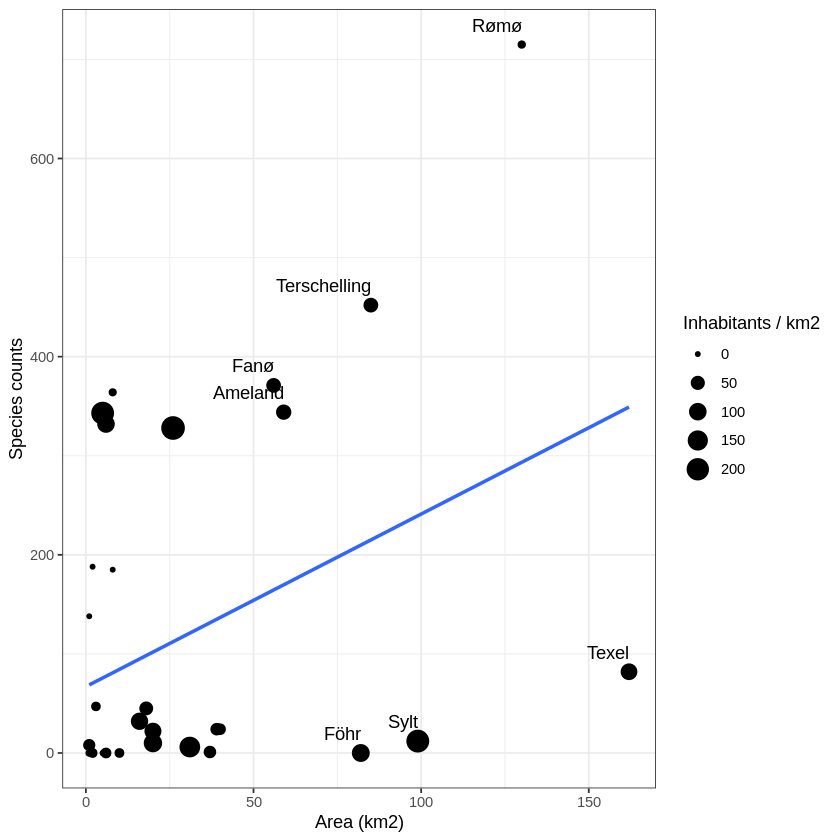

In [29]:
x <- islands_df$area
y <- islands_df$species_count
labels <- islands_df$name
ggplot(
    islands_df,
    aes(x = area, y = species_count)
) + 
geom_point(aes(size=pop_density)) +
geom_text(hjust=1, vjust=-1, aes(label=ifelse(area>50, name, ""))) +
xlab("Area (km2)") + ylab("Species counts") + 
guides(size=guide_legend(title="Inhabitants / km2")) +
theme_bw() + 
geom_smooth(method="lm", se=FALSE)

In [24]:
summary(x = area, y = species_count, islands_df)

     name             country               area          population     
 Length:35          Length:35          Min.   :  1.00   Min.   :    0.0  
 Class :character   Class :character   1st Qu.:  2.00   1st Qu.:    1.5  
 Mode  :character   Mode  :character   Median :  8.00   Median :  575.0  
                                       Mean   : 28.34   Mean   : 2258.8  
                                       3rd Qu.: 38.00   3rd Qu.: 2056.0  
                                       Max.   :162.00   Max.   :21000.0  
  pop_density     species_count  
 Min.   :  0.00   Min.   :  0.0  
 1st Qu.:  1.25   1st Qu.:  0.0  
 Median : 24.55   Median : 22.0  
 Mean   : 51.99   Mean   :116.4  
 3rd Qu.: 88.36   3rd Qu.:186.5  
 Max.   :232.00   Max.   :715.0  

In [69]:
biodiv.lm <- lm(species_count ~ area, data = islands_df)
summary(biodiv.lm)


Call:
lm(formula = species_count ~ area, data = islands_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-267.13  -82.14  -70.50  110.78  421.60 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  67.0132    34.6205   1.936   0.0615 .
area          1.7415     0.7178   2.426   0.0209 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 165.7 on 33 degrees of freedom
Multiple R-squared:  0.1514,	Adjusted R-squared:  0.1257 
F-statistic: 5.887 on 1 and 33 DF,  p-value: 0.02088


p-value is 0.02, therefore the regression is significant. 

## Discussion

However, Texel, Sylt and Föhr are clearly outliers, since these 3 islands have a much lower biodiversity than could be expected.

In [72]:
# Removing Texel, Sylt and Föhr
islands_df2 <- islands_df %>% filter(name != "Texel" & name != "Sylt" & name != "Föhr")
biodiv2.lm <- lm(species_count ~ area, data = islands_df2)
summary(biodiv2.lm)


Call:
lm(formula = species_count ~ area, data = islands_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-197.51  -70.26  -43.25   90.95  294.14 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.3740    29.1665   1.179    0.248    
area          4.4361     0.8391   5.287 1.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 134 on 30 degrees of freedom
Multiple R-squared:  0.4823,	Adjusted R-squared:  0.465 
F-statistic: 27.95 on 1 and 30 DF,  p-value: 1.037e-05


If I remove Texel, Sylt and Föhr, I get a much more significant result (p-value: 1e-05)

`geom_smooth()` using formula = 'y ~ x'


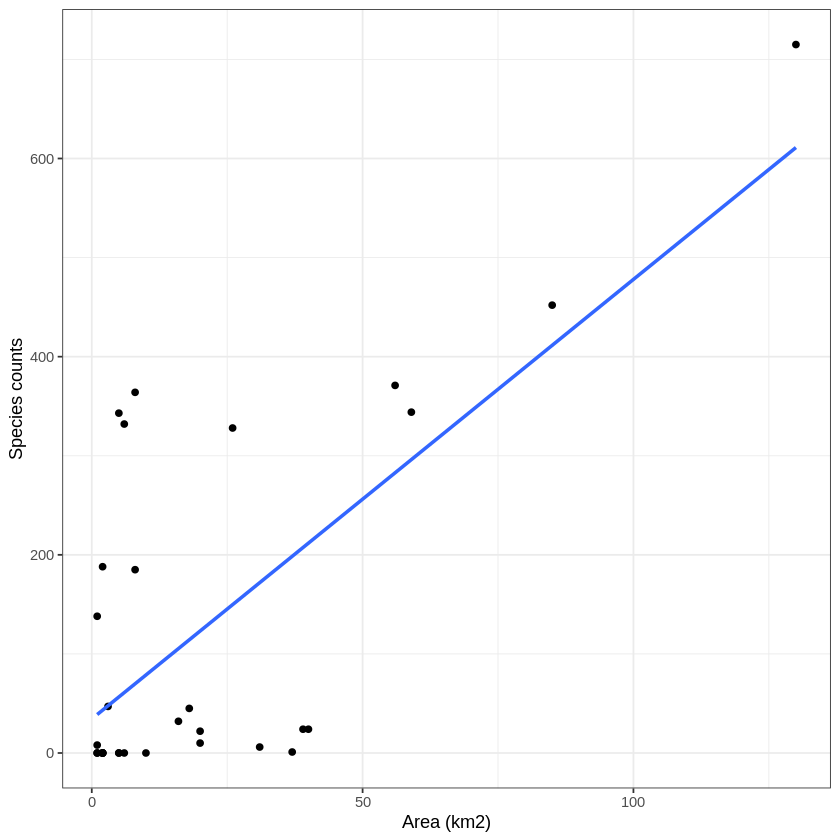

In [75]:
x <- islands_df2$area
y <- islands_df2$species_count
labels <- islands_df2$name
ggplot(
    islands_df2,
    aes(x = area, y = species_count)
) + 
geom_point() +
xlab("Area (km2)") + ylab("Species counts") + 
theme_bw() + 
geom_smooth(method="lm", se=FALSE)